# Data Frames

## Tabular Data

### DataFrame

- A __DataFrame__ (aka a table) is a 2-D labeled data structure with columns of potentially different types.
    - types: quantitative, qualitative (ordered, non-ordered, ...)
- First column is special: the __index__

![](dataframe.png)

### DataFrames are everywhere

- first goal of an econometrician: constitute a good dataframe
    - "cleaning the data"
- sometimes data comes from several linked dataframes
    - relational database
- dataframes / relational databases are so ubiquitous a language has been developed for them: SQL

<img src="relational_database.png" width=50%>

## Pandas

In [1]:
import pandas as pd

### pandas

- pandas = panel + datas
- created by WesMcKinsey, very optimized
- many options
- if in doubt: [minimally sufficient pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
    - small subset of pandas to do everything
- tons of online tutorials
    ex: [quantecon datascience](https://datascience.quantecon.org/)

### creating a dataframe (1)

In [6]:
# from a dictionary
d = {
    "country": ["USA", "UK", "France"],
    "comics": [13, 10, 12]   
}
pd.DataFrame(d)

,country,comics
0,USA,13
1,UK,10
2,France,12


### creating a dataframe (2)

In [11]:
# from a matrix
import numpy as np
M = np.array([
    [18, 150],
    [21, 200],
    [29, 1500]
])
    
df = pd.DataFrame( M, columns=["age", "travel"] )
df

,age,travel
0,18,150
1,21,200
2,29,1500


## File Formats

### Common file formats

- comma separated files: `csv` file
    - often distributed online
    - can be exported easily from Excel or LibreOffice
- stata files: use `pd.read_dta()`
- excel files: use `pd.read_excel()` or `xlsreader` if unlucky

### Comma separated file

In [12]:
txt = """year,country,measure
2018,"france",950.0
2019,"france",960.0
2020,"france",1000.0
2018,"usa",2500.0
2019,"usa",2150.0
2020,"usa",2300.0
"""
open('dummy_file.csv','w').write(txt) # we write it to a file

136

In [14]:
df = pd.read_csv('dummy_file.csv') # what index should we use ?
df

,year,country,measure
0,2018,france,950.0
1,2019,france,960.0
2,2020,france,1000.0
3,2018,usa,2500.0
4,2019,usa,2150.0
5,2020,usa,2300.0


### "Annoying" Comma Separated File

- Sometimes, comma-separated files, are not quite comma-separated...
    - inspect the file with a text editor to see what it contains
    - add options to `pd.read_csv`

In [16]:
txt = """year;country;measure
2018;"france";950.0
2019;"france";960.0
2020;"france";1000.0
2018;"usa";2500.0
2019;"usa";2150.0
2020;"usa";2300.0
"""
open('annoying_dummy_file.csv','w').write(txt) # we write it to a file

136

In [19]:
pd.read_csv("annoying_dummy_file.csv", sep=";")

,year,country,measure
0,2018,france,950.0
1,2019,france,960.0
2,2020,france,1000.0
3,2018,usa,2500.0
4,2019,usa,2150.0
5,2020,usa,2300.0


### Exporting a DataFrame

- pandas can export to many formats: `df.to_...`

In [20]:
print( df.to_csv() )

,year,country,measure
0,2018,france,950.0
1,2019,france,960.0
2,2020,france,1000.0
3,2018,usa,2500.0
4,2019,usa,2150.0
5,2020,usa,2300.0



In [23]:
df.to_stata('dummy_example.dta')

## Data Sources


### Types of Data Sources

- Where can we get data from ?
- Official websites
    - often in csv form
    - unpractical applications
    - sometimes unavoidable
    - open data trend: more unstructured data
- Data providers
    - supply an API (i.e. easy to use function)

<img src=bloomberg.png width=60%>

## Data providers

- commercial ones:
    - bloomberg, macrobond, factsets, quandl ...
- free ones:
    - `dbnomics`: many official time-series
    - `qeds`: databases used by quantecon
    - `vega-datasets`: distributed with altair
    - covid*: lots of datasets...
- reminder: python packages, can be installed in the notebook with
    - `!pip install ...`

In [2]:
!pip install vega_datasets

In [4]:
import vega_datasets
df = vega_datasets.data('iris')
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Inspecting data

- once the data is loaded as `df`, we want to look at some basic properties:
    - `df.head(5)` # 5 first lines
    - `df.tail(5)` # 5 first lines
    - `df.describe()` # summary
    - `df.mean()` # averages
    - `df.std()` # standard deviations



In [6]:
df.head(2)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [10]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Manipulating DataFrames

### Columns

Columns are defined by attribute `df.columns`

In [20]:
df.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species'], dtype='object')

This attribute can be set

In [23]:
df.columns = ['sLength', 'sWidth', 'pLength', 'pWidth', 'species']
df.head(2)

,sLength,sWidth,pLength,pWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### Indexing a column

A column can be extracted using its name as in a dictionary (like `df['sLength']`)

In [25]:
series = df['sWidth'] # note the resulting object: a series
series

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sWidth, Length: 150, dtype: float64

<AxesSubplot:>

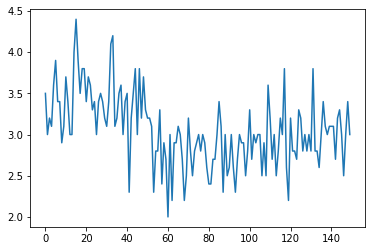

In [27]:
series.plot()

### Creating a new column

In [29]:
df['totalLength'] = df['pLength'] + df['sLength']
df.head(2)

,sLength,sWidth,pLength,pWidth,species,totalLength
0,5.1,3.5,1.4,0.2,setosa,6.5
1,4.9,3.0,1.4,0.2,setosa,6.3


### Replacing a column

In [32]:
df['totalLength'] = df['pLength'] + df['sLength']*0.5
df.head(2)

,sLength,sWidth,pLength,pWidth,species,totalLength
0,5.1,3.5,1.4,0.2,setosa,3.95
1,4.9,3.0,1.4,0.2,setosa,3.85


### Selecting several columns

- Index with a list of column names

In [36]:
e = df[ ['pLength', 'sLength'] ]
e.head(3)

,pLength,sLength
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7


### Selecting lines (1)

- use index range

In [215]:
df[2:4]

,sLength,sWidth,pLength,pWidth,species,totalLength
2,4.7,3.2,1.3,0.2,setosa,3.65
3,4.6,3.1,1.5,0.2,setosa,3.80


### Selecting lines (2)

- use boolean

In [38]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [44]:
bool_ind = df['species'] == 'virginica' # this is a boolean serie

In [46]:
e = df[ bool_ind ]
e.head(4)

,sLength,sWidth,pLength,pWidth,species,totalLength
100,6.3,3.3,6.0,2.5,virginica,9.15
101,5.8,2.7,5.1,1.9,virginica,8.00
102,7.1,3.0,5.9,2.1,virginica,9.45
103,6.3,2.9,5.6,1.8,virginica,8.75


### Selecting lines and columns

- sometimes, one wants finer control about which lines *and* columns to select:
    - use `df.loc[...]` which can be indexed as a matrix

In [54]:
df.loc[0:4, 'species']

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Combine everything

In [57]:
# Let's change the way totalLength is computed, only for 'virginica'
index = (df['species']=='virginica')
df.loc[index,'totalLength'] = df.loc[index,'sLength'] + 1.5*df[index]['pLength']

<ipython-input-57-c1b3e665535b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index]['totalLength'] = df.loc[index,'sLength'] + 1.5*df[index]['pLength']



## Reshaping DataFrames

In [1]:
txt_wide = """year,france,usa
2018,950.0,2500.0
2019,960.0,2150.0
2020,1000.0,2300.0
"""
open('dummy_file_wide.csv','w').write(txt_wide) # we write it to a file

71

In [2]:
txt_long = """year,country,measure
2018,"france",950.0
2019,"france",960.0
2020,"france",1000.0
2018,"usa",2500.0
2019,"usa",2150.0
2020,"usa",2300.0
"""
open('dummy_file_long.csv','w').write(txt_long) # we write it to a file

136

In [5]:
df_long = pd.read_csv("dummy_file_long.csv")
df_wide = pd.read_csv("dummy_file_wide.csv")

### Wide vs Long format (1)

- compare the following tables

In [6]:
df_wide

,year,france,usa
0,2018,950.0,2500.0
1,2019,960.0,2150.0
2,2020,1000.0,2300.0


In [7]:
df_long

,year,country,measure
0,2018,france,950.0
1,2019,france,960.0
2,2020,france,1000.0
3,2018,usa,2500.0
4,2019,usa,2150.0
5,2020,usa,2300.0


### Wide vs Long format (2)

- in long format: each line is an independent observation
    - two lines mayb belong to the same category (year, or country)
- in wide format: some observations are grouped
    - in the example it is grouped by year
- both representations are useful

### Converting from Wide to Long

In [8]:
df_wide.melt(id_vars='year')

,year,variable,value
0,2018,france,950.0
1,2019,france,960.0
2,2020,france,1000.0
3,2018,usa,2500.0
4,2019,usa,2150.0
5,2020,usa,2300.0


### Converting from Long to Wide

In [9]:
df_ = df_long.pivot(index='year', columns='country')
df_

measure        
country  france     usa
year                   
2018      950.0  2500.0
2019      960.0  2150.0
2020     1000.0  2300.0

In [10]:
# the result of pivot has a "hierarchical index"
# let's change columns names
df_.columns = df_.columns.get_level_values(1)
df_

country,france,usa
year,,
2018,950.0,2500.0
2019,960.0,2150.0
2020,1000.0,2300.0


### groupby

`groupby` is a very powerful function which can be used to work directly on data in the long format.

In [11]:
df_long.groupby("country").apply(lambda df: df.mean())

,year,measure
country,,
france,2019.0,970.000000
usa,2019.0,2316.666667


## Merging

### Merging two dataframes

- Suppose we have two dataframes, with related observations
- How can we construct one single database with all informations?
- Answer:
    - `concatenate` if long format
    - `merge` databases if wide format
- Lots of subtleties when data gets complicated
    - we'll see them in due time

In [12]:
txt_long_1 = """year,country,measure
2018,"france",950.0
2019,"france",960.0
2020,"france",1000.0
2018,"usa",2500.0
2019,"usa",2150.0
2020,"usa",2300.0
"""
open("dummy_long_1.csv",'w').write(txt_long_1)

136

In [13]:
txt_long_2 = """year,country,recipient
2018,"france",maxime
2019,"france",mauricette
2020,"france",mathilde
2018,"usa",sherlock
2019,"usa",watson
2020,"usa",moriarty
"""
open("dummy_long_2.csv",'w').write(txt_long_2)

150

In [16]:
df_long_1 = pd.read_csv('dummy_long_1.csv')
df_long_2 = pd.read_csv('dummy_long_2.csv')

## Merging two DataFrames with pandas

In [17]:
df_long_1.merge(df_long_2)

,year,country,measure,recipient
0,2018,france,950.0,maxime
1,2019,france,960.0,mauricette
2,2020,france,1000.0,mathilde
3,2018,usa,2500.0,sherlock
4,2019,usa,2150.0,watson
5,2020,usa,2300.0,moriarty
